In [11]:
import datetime as dt
from sttn.data.nyc import Service311RequestsDataProvider

provider = Service311RequestsDataProvider()
network = provider.get_data(dt.datetime(2020, 1, 1), dt.datetime(2020, 12, 31))

In [5]:
network.shape()

(236, 2410730)

<AxesSubplot:xlabel='time'>

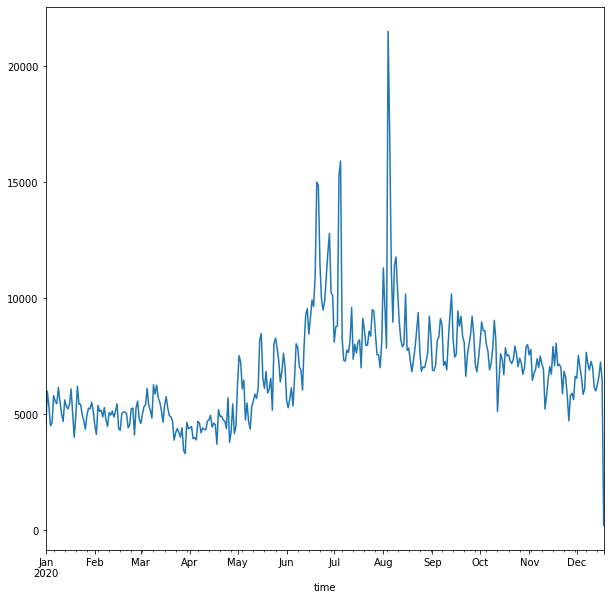

In [14]:
network.edges_df.resample('1d', on='time').time.count().plot(figsize=(10,10))

In [28]:
network.edges_df.complaint_type.value_counts()

Noise - Residential        394001
Noise - Street/Sidewalk    204461
Illegal Parking            186452
HEAT/HOT WATER             147006
Blocked Driveway           111012
                            ...  
Tanning                         1
DEP Sidewalk Condition          1
Facades                         1
Sweeping/Inadequate             1
Tunnel Condition                1
Name: complaint_type, Length: 181, dtype: Int64